## Extract and Remove Value/Unit from catalog_content
This cell extracts the Value and Unit from the end of `catalog_content`, creates two new columns, and then strips these details from the original text.

# Import Libraries and Create Directories

In [38]:
import os
import pandas as pd
import numpy as np
from IPython import display
from urllib.parse import urlparse, unquote
import re
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

move the csv files into the 'dataset' directory after creating it

In [39]:
# projects_dir_path = os.path.join(os.getcwd(), "projects")
# # os.makedirs(projects_dir_path, exist_ok=True)
# price_predict_project_path = os.path.join(projects_dir_path, "price_predict")
# os.makedirs(price_predict_project_path, exist_ok=True)
# os.chdir(price_predict_project_path)

In [ ]:
# put your own directory path where the dataset is located
os.chdir(r'C:\Users\alvin\Desktop\projects\price_predict\dataset')

In [42]:
os.listdir()

['images', 'sample_test.csv', 'sample_test_out.csv', 'test.csv', 'train.csv']

In [43]:
# datasets_dir_path = os.path.join(price_predict_project_path, "dataset")
# os.chdir(datasets_dir_path)
# os.listdir()

In [55]:
train_df = pd.read_csv("train.csv")
train_df.sample(3)

,sample_id,catalog_content,image_link,price
47660,294714,"Item Name: SNICKERS Fun Size Chocolate Candy Bars 11.18-Ounce Bag (Pack of 6)\nBullet Point 1: Contains six (6) 11.18-ounce bags of Fun Size SNICKERS Chocolate Bars\nBullet Point 2: Each individually wrapped SNICKERS Chocolate Bars is sure to satisfy\nBullet Point 3: A bag of SNICKERS Candy Bars is perfect for sharing with friends and family when you need a fun-sized snack in bulk\nBullet Point 4: SNICKERS Fun Size Bars make great piñata candy, chocolate treats, and ingredients for baking desserts\nBullet Point 5: SNICKERS Chocolate Bars are made with peanuts, nougat and caramel filling, surrounded by real milk chocolate\nValue: 67.08\nUnit: ounce\n",https://m.media-amazon.com/images/I/71XQN6t1xbL.jpg,7.89
46835,247837,"Item Name: WILDE Protein Chips Spicy Queso, Thin and Crispy High Protein Snacks, Keto Friendly, Low Carb Chips, Real Ingredients, 1.34oz (Pack of 8)\nBullet Point 1: FREE OF COMMON ALLERGENS: WILDE Protein Chips do not contain potato, corn, processed proteins, gluten, grains, dairy, or nuts. These keto chips are perfect as high protein snacks for adults or in school lunches and more!\nBullet Point 2: CHIPS GONE WILDE: WILDE chips are the impossible snack made by transforming 100% all-natural chicken into crispy chicken chips for humans. So good, we deserve to be a little cocky as delicious carnivore snacks, keto snacks, and high protein snacks!\nBullet Point 3: PACKS A (PROTEIN) PUNCH: WILDE high protein chips are the perfect high-protein, low-carb snack. Each serving of WILDE Protein Chips has 10g of protein, low net carbs and is keto friendly\nBullet Point 4: A NEW TAKE ON A CLASSIC FLAVOR: WILDE protein crisps offer the simplicity and crunch of a traditional potato chip, minus the potatoes. Eat these high protein chips on their own or with your favorite dip\nBullet Point 5: SIZED FOR ON-THE-GO SNACKING: Comes with eight (8) 1.34oz bags of carnivore crisps that are perfect keto snacks for adults and are ideal for snacking anywhere, anytime\nValue: 8.0\nUnit: Count\n",https://m.media-amazon.com/images/I/71t2dSAFqhL.jpg,29.99
27058,285132,"Item Name: Fresh Gourmet Classic Caesar Croutons, 5 Oz Pouch\nBullet Point 1: crunchy toppings add taste and excitement to salads and more\nBullet Point 2: Fresh Gourmet Cranberries Dried & Sweet\nBullet Point 3: 0 grams of trans\nValue: 5.0\nUnit: Ounce\n",https://m.media-amazon.com/images/I/61e0GFkf-fL.jpg,1.99


# Check data quality

In [ ]:
# Check for missing values
train_df.isnull().sum()

sample_id          0
catalog_content    0
image_link         0
price              0
value              1
unit               1
dtype: int64

In [113]:
# Remove 'Item Name: ' prefix from catalog_content
def remove_item_name_prefix(text):
    return text.strip().replace('Item Name:', '').strip()

train_df['catalog_content'] = train_df['catalog_content'].apply(remove_item_name_prefix)
train_df.sample(3)

,sample_id,catalog_content,image_link,price,value,unit,file_path_obj,file_path
13989,256200,"barkTHINS Snacking Chocolate, Holiday Gifting, Peppermint Pretzel with Sea Salt, 4.7 Ounce\nBullet Point 1: Indulgent, irresistible slivers of dark chocolate bark\nBullet Point 2: Packed with peppermint and salted pretzels\nBullet Point 3: Easily snap-able for portions you can snack on\nBullet Point 4: Fair trade certified by fair trade USA\nBullet Point 5: Non-GMO project verified",https://m.media-amazon.com/images/I/81Ovca8GV0L.jpg,5.49,4.7,Ounce,images\81Ovca8GV0L.jpg,images\81Ovca8GV0L.jpg
38855,259993,Spectrum Naturals Sesame Oil 16 oz (Pack of 3),https://m.media-amazon.com/images/I/71tqXuitpVL.jpg,9.34,48.0,Fl Oz,None,None
21370,72117,"NY Spice Shop Chocolate Covered Espresso Beans – 8 Ounce New York Espresso Beans Candy - Dark Chocolate Coffee Bean Snack - Espresso Candy Variety Pack - A Coffee Lover's Chocolate Delight\nBullet Point 1: NEW YORK CHOCOLATE COVERED COFFEE BEANS WHOLE ESPRESSO BEANS - Experience our New York chocolate covered espresso beans. Premium roasted espresso coffee beans are coated in rich, high-quality chocolate with a refreshing hint of mocha beans. Enjoy a delightful boost of energy with every indulgent bite. Perfect for a luxurious treat that revitalizes both body and spirit.\nBullet Point 2: DESIRABLE DARK CHOCOLATE COVERED COFFEE BEANS - With every bite, experience the satisfying crunch of NY Spice Shop New York espresso energy beans enrobed in smooth, velvety chocolate, offering a textural contrast that delights the senses and keeps you coming back for more.\nBullet Point 3: VERSATILE SNACK DARK CHOCOLATE NEW YORK ESPRESSO BEANS WITH COFFEE - The blend of dark chocolate and freshly New York chocolate coffee beans offer a balance of flavors! Whether enjoyed as a standalone treat, added to your favorite trail mix, or sprinkled atop desserts and baked goods, our New York coffee beans espresso offers a versatile snacking experience that can be enjoyed anytime, anywhere.\nBullet Point 4: GOURMET NEW YORK CHOCOLATES CANDY SNACKS - Crafted with care using only the finest ingredients, including premium espresso beans and decadent chocolate, NY Spice Shop New York best espresso beans embody gourmet quality and exceptional taste, making them a luxurious indulgence for any occasion.\nBullet Point 5: CONVENIENT NEW YORK EXPRESSO BEANS PICK-ME-UP - Perfect for busy days, long commutes, or afternoon slumps, our dark chocolate coffee beans provide a convenient and portable pick-me-up that satisfies cravings and recharges your energy levels, ensuring you stay fueled and focused throughout the day.\nProduct Description: <b>GET READY FOR A CHOCOLATE CANDY FLAVOR EXPLOSION! DIVE INTO THE DIVINE FUSION OF BULK CHOCOLATE AND FRESHLY ROASTED COFFEE BEANS, SWIRLING TOGETHER IN A SYMPHONY OF SWEET CREAMINESS AND SUBTLE BITTERNESS, TANTALIZING EVERY TASTE BUD. DON'T MISS OUT – STOCK UP TODAY AND SAVOR THE MAGIC! </b><br><br> <li><b>MORNING ASSORTED CHOCOLATE BOOST -</b> Kick start your day by enjoying a handful of espresso beans candy alongside your morning coffee or tea. The combination of caffeine from the espresso beans chocolate candy bulk and the indulgent flavor of chocolate provides an energizing start to your day. <li><b>GOURMET CHOCOLATE MIDDAY SNACK -</b> Combat afternoon fatigue by snacking on espresso chocolate beans during your break or while working. The caffeine chocolate content can help to perk you up and keep you alert, making it a great alternative to sugary snacks or energy drinks. <li><b>ON-THE-GO COFFEE CHOCOLATE ENERGY -</b> Keep a small pack of chocolate express beans in your bag or pocket for a convenient energy boost whenever you need it. Whether you're running errands, traveling, or attending meetings, these tasty treats provide a quick pick-me-up to keep you going. <li><b>STUDY OR WORK SESSIONS WITH CHOCOLATE PACK -</b> Stay focused and productive during study or work sessions by munching on dark 

Every single record comes with values and units except for one, do a bit of Feature Engineering

In [66]:
# Extract "Value" and "Unit" from catalog_content into two new columns, then remove them from catalog_content
def extract_value_unit_and_strip(text):
    match = re.search(r'Value:\s*([^\n]+)\s*Unit:\s*([^\n]+)', text)
    if match:
        value = match.group(1).strip()
        unit = match.group(2).strip()
        # Remove the matched part from the text
        stripped = re.sub(r'Value:\s*[^\n]+\s*Unit:\s*[^\n]+', '', text).strip()
        return pd.Series([value, unit, stripped])
    else:
        return pd.Series([None, None, text])

train_df[['value', 'unit', 'catalog_content']] = train_df['catalog_content'].apply(extract_value_unit_and_strip)

In [78]:
train_df.sample(5)

,sample_id,catalog_content,image_link,price,value,unit
53466,179274,"Anna and Sarah Organic Dried Apricots in Resealable Bag, 3lbs 1 Pack\nBullet Point 1: SUN-DRIED ORGANIC TURKISH APRICOTS: Energy booster, sweet taste. Natural source of energy and many healthy nutrients.\nBullet Point 2: HEALTHY SNACKS: High in fiber, rich source of antioxidants, vitamin A, potassium, magnesium and iron.\nBullet Point 3: CERTIFIED USDA ORGANIC: Organic and natural, no preservatives, no sulfur added apricots.\nBullet Point 4: RECIPE IDEAS: Add them to your smoothies, desserts, trail mixes, granola's, or substitute them with sugar in recipes!\nBullet Point 5: LOCK FOR FRESHNESS: Comes in a resealable bag, stays fresh.\nProduct Description: SUN-DRIED ORGANIC TURKISH APRICOTS: Energy booster, sweet taste. Natural source of energy and many healthy nutrients. <br> HEALTHY SNACKS: High in fiber, rich source of antioxidants, vitamin A, potassium, magnesium and iron. <br> CERTIFIED USDA ORGANIC: 100% organic and all natural, no preservatives, no sulfur added apricots. <br> RECIPE IDEAS: Add them to your smoothies, desserts, trail mixes, granola's, or substitute them with sugar in recipes! <br> LOCK FOR FRESHNESS: Comes in a resealable bag, stays fresh. <br>",https://m.media-amazon.com/images/I/71Xp0nNe83L.jpg,23.00,48.0,Ounce
73529,33323,"Imagine Organic Creamy Soup, Light Sodium Garden Tomato, 32 oz.\nBullet Point 1: One 32 oz. carton of Imagine Organic Creamy Light Sodium Garden Tomato Soup\nBullet Point 2: Made with organic tomatoes and herbs\nBullet Point 3: Dairy and gluten-free\nBullet Point 4: Certified Kosher and vegan\nBullet Point 5: Non-GMO Project Verified and USDA-Certified Organic",https://m.media-amazon.com/images/I/61-Lyvf2VeL.jpg,7.32,32.0,Fl Oz
25624,204066,Amoretti - Blueberry Bar & Smoothie Concentrate\nBullet Point 1: Amoretti Item #ACAP-7\nBullet Point 2: Highly concentrated\nBullet Point 3: Made with real fruit.\nBullet Point 4: Shelf stable even (after opening)\nBullet Point 5: No refrigeration needed,https://m.media-amazon.com/images/I/51p-al2knuL.jpg,37.67,25.4,Fl Oz
44518,134371,McCafe 24328029 McCafe Breakfast Blend Coffee K-Cup Pods Light Roast\nBullet Point 1: Sold as 24/Box.\nBullet Point 2: McCafe Breakfast Blend K-Cup pods\nBullet Point 3: 24 K-cups per box\nBullet Point 4: 100% Arabica coffee Rich and Vibrant.\nBullet Point 5: Let the enticing aroma awaken your senses and experience the bright and lively flavor.\nProduct Description: Let the enticing aroma awaken your senses and experience the bright and lively flavor McCafe Breakfast Blend K-Cup pods. 24 K-cups per box. 100% Arabica coffee. Rich and Vibrant. Let the enticing aroma awaken your senses and experience the bright and lively flavor.,https://m.media-amazon.com/images/I/81zhCWmfpPS.jpg,14.73,24.0,Count
28865,229388,"Brickhouse Coffee, Donut Blend Ground Coffee, 144/2.25 oz packets 144 eaches Medium Roast\nBullet Point 1: 144 - 2.25 oz packets\nBullet Point 2: This coffee is made from a blend of high-quality Arabica and Robusta coffee beans that are carefully selected and roasted to perfection to create a rich and full-bodied flavor.\nBullet Point 3: Roasted fresh weekly!",https://m.media-amazon.com/images/I/71s-bOp9SGL.jpg,188.00,324.0,Ounce


In [ ]:
# number of records share everything the same except for price
train_df[['catalog_content', 'image_link', 'value', 'unit']].duplicated().sum()

46

Some records share the same images, even though they are the same product, they have different quantities

In [87]:
# Get the columns we want to check
cols_to_check = ['catalog_content', 'image_link', 'value', 'unit']
# Create boolean mask of duplicated rows
duplicated_mask = train_df[cols_to_check].duplicated(keep=False)
# Filter the dataframe using the mask
dup_df = train_df[duplicated_mask].sort_values(by='image_link')
dup_df.sample(5)

,sample_id,catalog_content,image_link,price,value,unit,file_path_obj,file_path
65514,39240,"WHOLESOME SWEETENERS SUGAR CANE ORG FTC, 25 LB",https://m.media-amazon.com/images/I/21soCCRDfCL.jpg,97.000,400.0,Fl Oz,images\21soCCRDfCL.jpg,images\21soCCRDfCL.jpg
4468,133980,"McCormick Golden Dipt Cracker Meal Seafood Fry Mix, 10 oz (Pack of 8)\nBullet Point 1: Wheat flour-based fry mix gives seafood a crumb coating that seals in juices\nBullet Point 2: 3 easy steps: lightly moisten fish, coat with Cracker Meal, then fry\nBullet Point 3: Tasty with tilapia, shrimp, scallops, shucked oysters and soft-shell crabs\nBullet Point 4: Substitute Cracker Meal for bread crumbs in meat loaf or meat balls\nBullet Point 5: Dip fish in a mixture of 3 tbsp milk and 2 beaten eggs for a thicker coating",https://m.media-amazon.com/images/I/81aNgo-u-RL.jpg,26.800,80.0,Ounce,images\81aNgo-u-RL.jpg,images\81aNgo-u-RL.jpg
55814,48630,"Natural Cane Sugar,Jug",https://m.media-amazon.com/images/I/21Qqeb-waYL.jpg,11.245,48.0,Ounce,images\21Qqeb-waYL.jpg,images\21Qqeb-waYL.jpg
54470,48397,Garlic Powder – 10.5 oz,https://m.media-amazon.com/images/I/616e8iiHXaL.jpg,12.235,10.5,Ounce,images\616e8iiHXaL.jpg,images\616e8iiHXaL.jpg
11795,185463,"AmazonFresh Hazelnut Flavored Coffee, Ground, Medium Roast, 12 Ounce\nBullet Point 1: Fragrant medium-light roast with toasted hazelnut flavor\nBullet Point 2: One 12-ounce bag of ground coffee\nBullet Point 3: 100% Arabica coffee grown in Central and South America\nBullet Point 4: Roasted and packed in the U.S.A.\nBullet Point 5: Shown as a serving suggestion\nBullet Point 6: An Amazon brand",https://m.media-amazon.com/images/I/81w29mbZOtL.jpg,7.290,12.0,Ounce,images\81w29mbZOtL.jpg,images\81w29mbZOtL.jpg


In [102]:
# Group by catalog_content and image_link, then aggregate
cleaned_df = train_df.groupby(cols_to_check).agg({
    'sample_id': 'min',  # keep lowest sample_id
    'price': 'mean'      # take average of prices
}).reset_index()

# Show the first few rows to verify
cleaned_df.sample(5)

# Print the reduction in records
print(f"Original records: {len(train_df)}")
print(f"After deduplication: {len(cleaned_df)}")

Original records: 75000
After deduplication: 74953


# Download and Handle Images

In [89]:
images = train_df['image_link']
images.sample(5)

21558    https://m.media-amazon.com/images/I/81lProjDDXL.jpg
47998    https://m.media-amazon.com/images/I/616B6QnmKpL.jpg
56640    https://m.media-amazon.com/images/I/81wZWzTuXKL.jpg
61063    https://m.media-amazon.com/images/I/81Jr0utxPKL.jpg
10384    https://m.media-amazon.com/images/I/61BKIX14k3L.jpg
Name: image_link, dtype: object

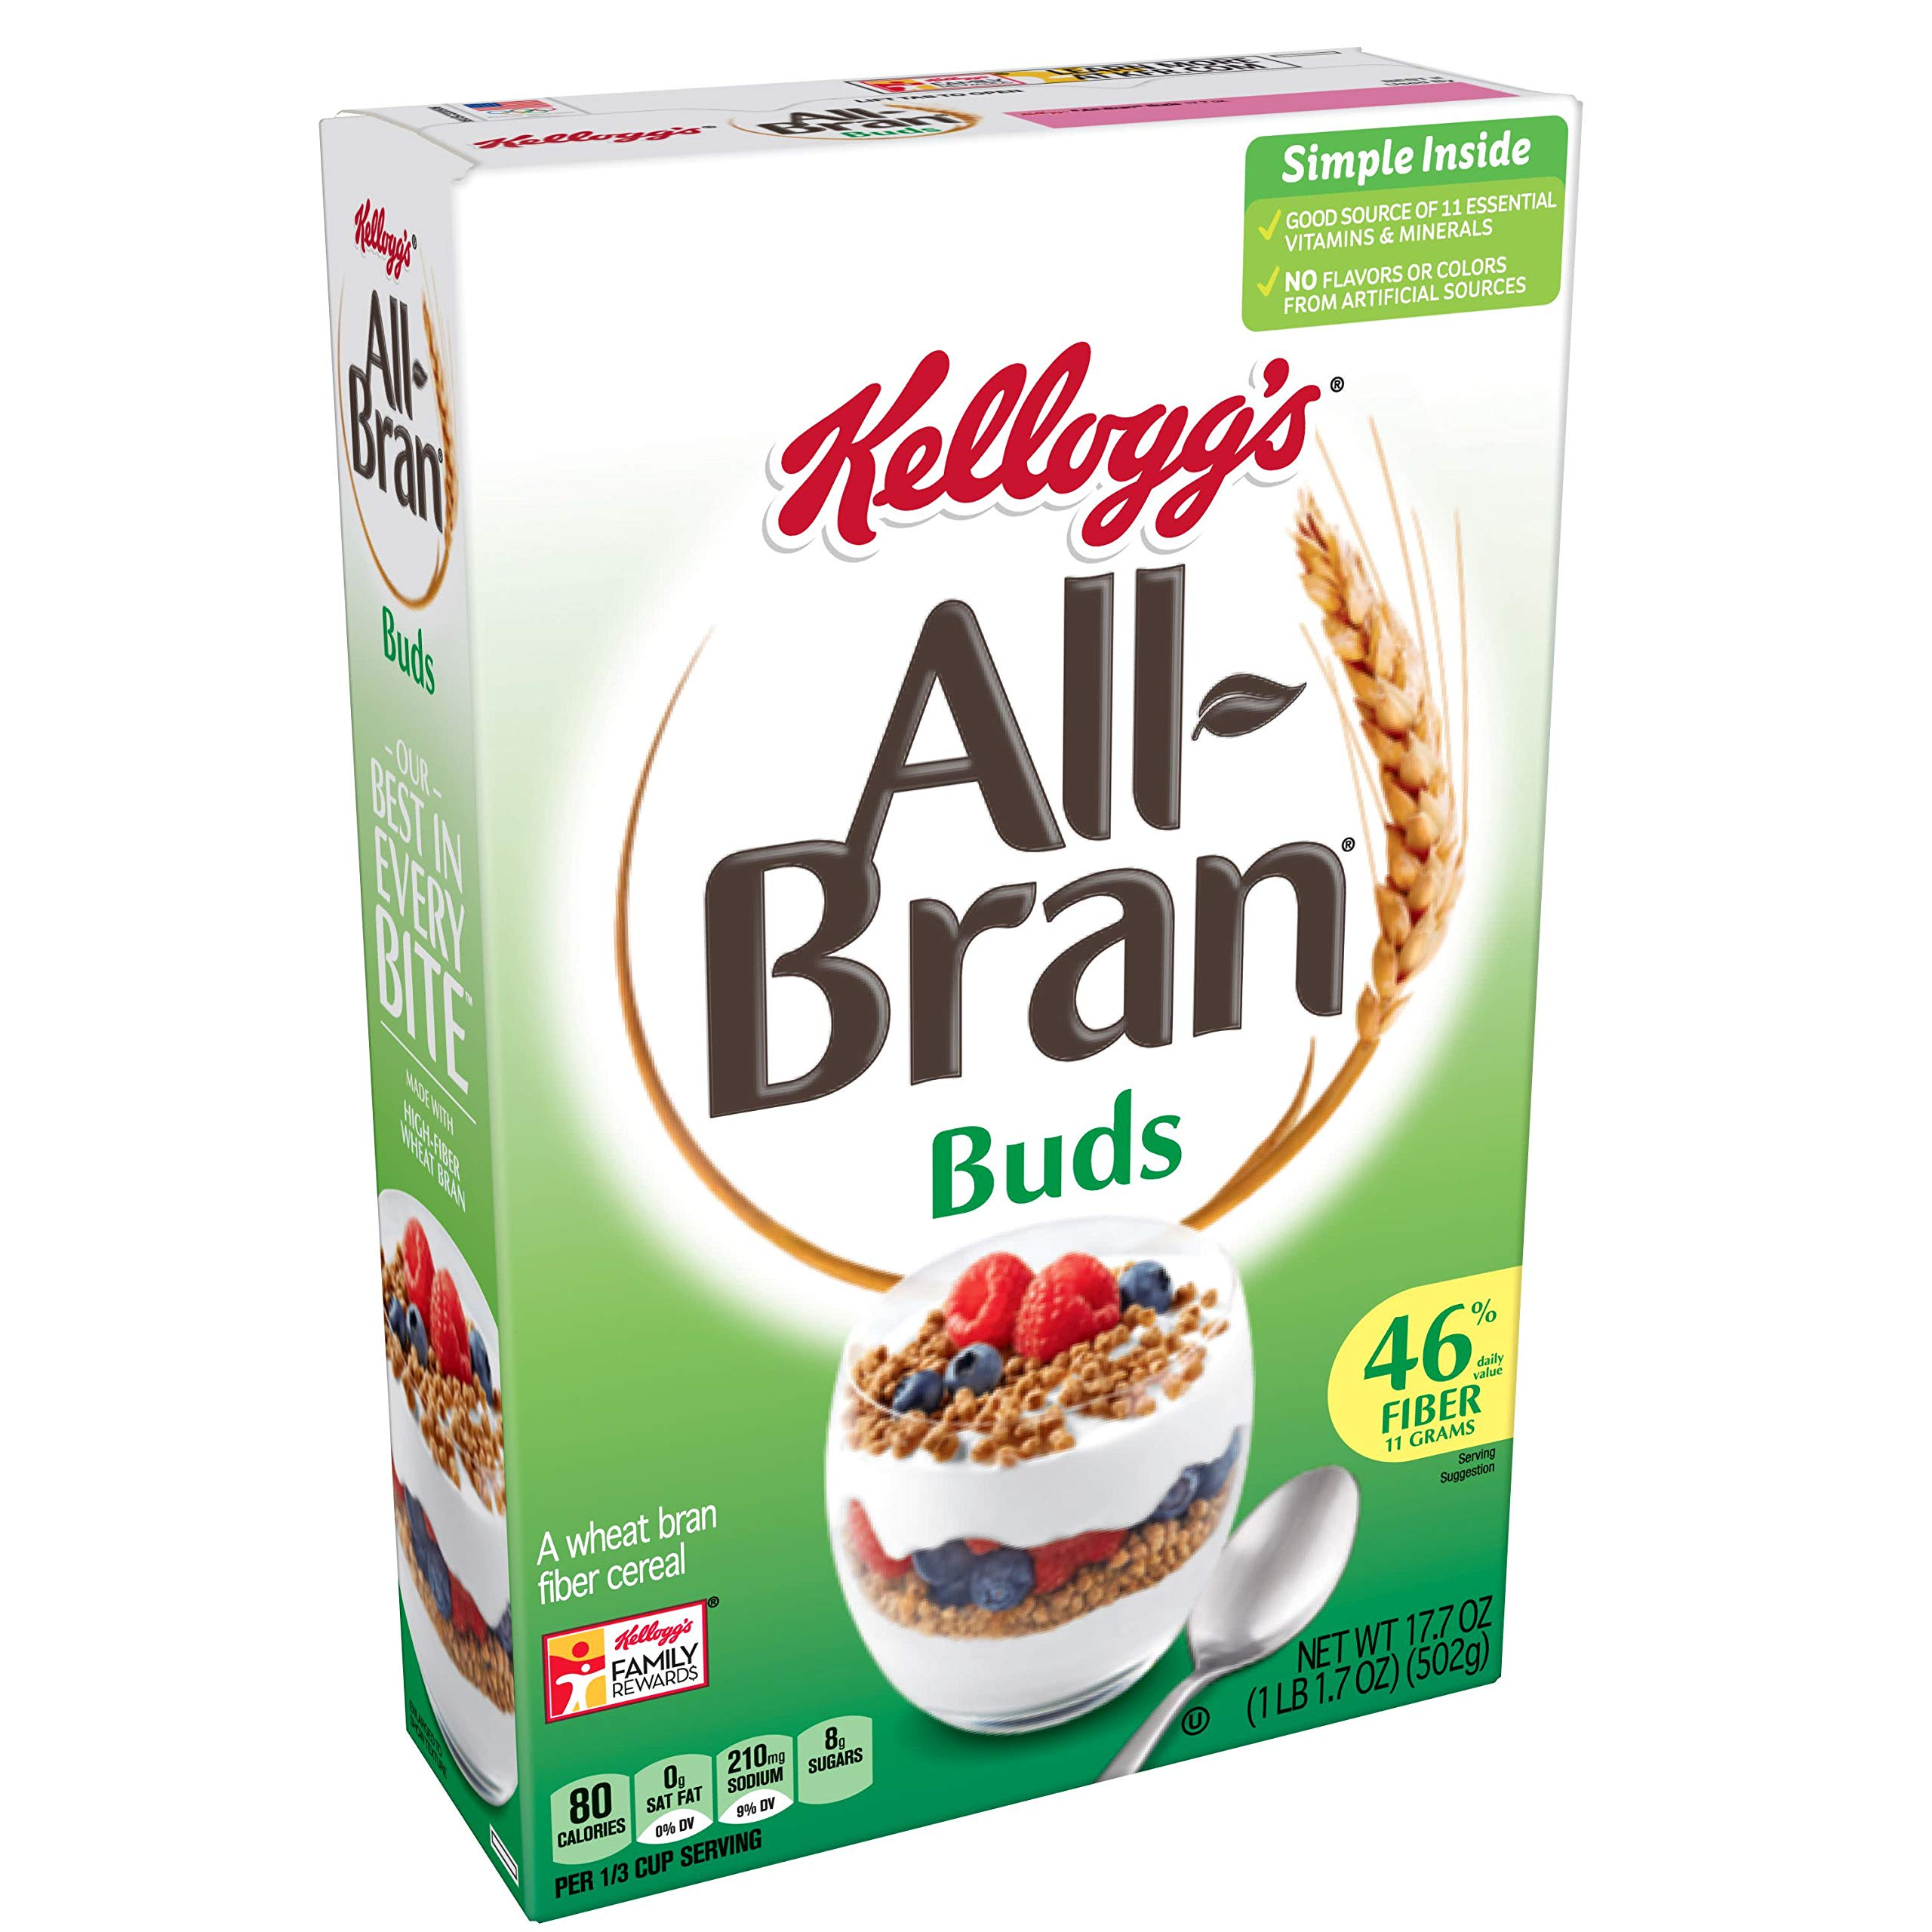

In [90]:
# Get a single image URL
test_image = images.sample(1).iloc[0] # use iloc because sample returns a Series
# test_image = images.sample(1)
display.Image(test_image, width=300, height=200)
# display.Image()

In [91]:
print(test_image)

https://m.media-amazon.com/images/I/81u7P+nKhNL.jpg


In [92]:
import re
import os
import pandas as pd
import multiprocessing
from time import time as timer
from tqdm import tqdm
import numpy as np
from pathlib import Path
from functools import partial
import requests
import urllib

def download_image(image_link, savefolder):
    if(isinstance(image_link, str)):
        filename = Path(image_link).name
        image_save_path = os.path.join(savefolder, filename)
        if(not os.path.exists(image_save_path)):
            try:
                urllib.request.urlretrieve(image_link, image_save_path)    
            except Exception as ex:
                print('Warning: Not able to download - {}\n{}'.format(image_link, ex))
        else:
            return
    return

def download_images(image_links, download_folder):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)
    results = []
    download_image_partial = partial(download_image, savefolder=download_folder)
    with multiprocessing.Pool(50) as pool:
        for result in tqdm(pool.imap(download_image_partial, image_links), total=len(image_links)):
            results.append(result)
        pool.close()
        pool.join()

In [95]:
os.listdir()

['images',
 'projects',
 'sample_test.csv',
 'sample_test_out.csv',
 'test.csv',
 'train.csv']

In [94]:
images_dir_path = os.path.join(datasets_dir_path, "images")
os.makedirs(images_dir_path, exist_ok=True)

In [ ]:
# Multi-threading is somehow not working for my machine, downloading images one by one. Try the download_images function first and see if it works
# for image in images:
#     download_image(image, images_dir_path)

In [98]:
# number of images that are unable to be downloaded
len(images) - len(os.listdir("images"))

25494

In [108]:
# 
IM_DIR = Path("images")
all_paths = [p for p in IM_DIR.rglob("*")]
by_last15_fname = {}
by_last15_stem  = {}

for p in all_paths:
    fname = p.name.lower()           # e.g., abc...xyz.jpg
    stem  = p.stem.lower()           # abc...xyz
    by_last15_fname[fname[-15:]] = p
    by_last15_stem[stem[-15:]]   = p


def url_keys(url: str):
    base = Path(unquote(urlparse(url).path)).name.lower()
    return base[-15:], Path(base).stem.lower()[-15:]

def match_existing_path(url: str):
    last15_fname, last15_stem = url_keys(url)
    return (
        by_last15_fname.get(last15_fname)
        or by_last15_stem.get(last15_stem)
    )

cleaned_df["file_path_obj"] = cleaned_df["image_link"].map(match_existing_path)
cleaned_df["image_path"] = cleaned_df["file_path_obj"].map(lambda p: str(p) if p else None)

In [104]:
cleaned_df.sample(3)

,catalog_content,image_link,value,unit,sample_id,price,file_path_obj,file_path
30277,"Herr's Old Bay Potato Chips, 7.75 Ounce (Pack of 12 Bags) – Classic Chips with Bold Old Bay Flavor – Perfect for Snacking\nBullet Point 1: Fresh From the Factory\nBullet Point 2: Shelf life of 45-60 days\nProduct Description: The Older, The Better. Celebrating three decades of Herr's Old Bay Potato Chips. For more than 30 years now Herr's has been seasoning fresh-cut potato chips with the classic blend of heat, sweet and savory known as Old Bay. Originally blended in 1939 to spice up the flavor of fresh-caught Maryland crabs, Old Bay has become a coast to coast classic that's as American as, well, the potato chip.",https://m.media-amazon.com/images/I/81CyFdbNG7L.jpg,93.0,Ounce,228327,4.880,None,None
61487,"Smackalicious Seafood Sauce (Spicy) with Lemon Rain\nBullet Point: Vegan/Vegetarian Friendly: Our Mild and Spicy flavors are Vegan friendly and our Garlic flavor is vegetarian. Versatile: Delicious with veggies, seafood, eggs, meat and rice dishes Sealed fresh: Sealed fresh for easy pantry shelf storage Made with fresh ingredients: Made with fresh herbs, spices, onions, ginger and garlic, for an explosion of flavor in your mouth Easy Prep: No more recipes, just heat and serve with your favorite seafood dish!\nProduct Description: Blove's Smackalicious Sauce. Your Ultimate Flavor Elevator! Indulge in the sensational taste of Seafood with Blove's Smackalicious Seafood Sauce. Crafted with a passion for flavor and a love for seafood, this sauce promises to take your seafood dining experience to new heights. With a perfect blend of premium ingredients, Blove's Smackalicious Seafood Sauce (available in Garlic, Spicy and Mild) is designed to tantalize your taste buds and infuse your favorite seafood dishes with a burst of rich, mouthwatering flavors. Whether you're a seafood enthusiast or a culinary explorer, this sauce is a must-have in your kitchen arsenal. Flavor packed ingredients ensure you get intense flavor with every bite. The spice, herbs and citrus are amazing. Unlock the secret to seafood bliss with Blove's Smackalicious Seafood Sauce with Lemon Rain. It's time to make every seafood feast an unforgettable culinary adventure.",https://m.media-amazon.com/images/I/71uLeScxecL.jpg,12.0,Ounce,243314,24.990,images\71uLeScxecL.jpg,images\71uLeScxecL.jpg
10304,"COFFEE MATE French Vanilla Liquid Coffee Creamer 24 Ct. Box | Non-dairy, Lactose Free Creamer\nBullet Point 1: Coffee mate French Vanilla Liquid Creamer is vanilla perfection and coffee’s perfect mate. Package contains 24 single-creamer tubs.\nBullet Point 2: Stir in the delicious, rich taste anytime for a warm, rich classic cup that’s non-dairy, lactose-free, and cholesterol-free\nBullet Point 3: Whether you’re sharing with a friend or taking a moment to recharge, Coffee mate French Vanilla is the perfect way to wake up your cup\nBullet Point 4: Add in the right amount of flavor to suit your taste and transform your coffee into flavorful deliciousness\nBullet Point 5: Package contains 24 single-creamer tubs",https://m.media-amazon.com/images/I/81tm1KxfpNL.jpg,nan,None,175419,3.875,None,None


In [109]:
# number of available images for training samples
available_count = cleaned_df["image_path"].notnull().sum()
available_count

51973

In [111]:
finalized_df = cleaned_df.drop(columns=["image_link", "file_path_obj"])[cleaned_df['file_path'].notnull()][['sample_id', 'catalog_content', 'image_path', 'value', 'unit', 'price']]
finalized_df.sample(3)

,sample_id,catalog_content,image_path,value,unit,price
70784,34003,"Van Houtte Raspberry Chocolate Truffle Keurig K-Cups, 18 Count, 6.35 OZ (180g)\nBullet Point: 0",images\81uGUKIHuAL.jpg,18.0,Count,21.50
55940,1113,"RXBAR Real Food Protein bar, Peanut Butter, Gluten Free, 1.83oz Bars, 4Count, 1.83 oz\nBullet Point 1: Gluten Free: This protein bar is gluten free for those with gluten intolerance or sensitivity.\nBullet Point 2: Real Food Ingredients: Made with real food ingredients like peanut butter, eggs, and oats.\nBullet Point 3: High Protein: Provides 10g of plant-based protein per bar to help build and repair muscles.\nBullet Point 4: Kosher and Vegan: Certified kosher and vegan friendly for all dietary needs.\nBullet Point 5: Convenient Portable Packaging: Comes in a resealable pouch for on-the-go snacking.\nProduct Description: RXBAR Peanut Butter 4ct",images\51QaCmpqVSL.jpg,4.0,Count,14.93
20122,214399,"Emeril Lagasse 5 Oz, 3-Pack and 6-Pack Seasoning Blend: Original Essence, Cajun, Blackened, Chicken Rub, Steak Rub and Rib Rub Best Seasonings and Spices for Cooking (Rib Rub - 3PK)\nBullet Point 1: Emeril's Seasonings - Each seasoning blend is Crafted by the world-renowned chef, these seasonings bring his signature bold flavors straight to your kitchen using a combination of fine herbs and spices to give your food a distinctive, robust flavor. Emeril's Seasonings are your go-to option for bringing a little magic to any dish, whether you're grilling, roasting, or sautéing.\nBullet Point 2: Inspiration for Cooking - Trying out new seasonings can inspire creativity in your cooking. With Emeril Lagasse's blends, you might discover new favorite dishes or ways to spice up old classics.\nBullet Point 3: Grilling Seasoning - Enhances the flavor of any grilled food with a perfect balance of zesty spices and smokey spices. Any grilled food, from tender steaks to colorful veggies, is elevated by it.\nBullet Point 4: Everyday Seasoning - Bursting with savory flavors like garlic, paprika, and spices, it adds a perfect zest to any dish. Whether sprinkled on meats or veggies, it elevates everyday cooking to delicious new heights with every shake.\nBullet Point 5: Chef's Choice - A zesty and flavorful mix of spices crafted by renowned chef Emeril Lagasse. Perfect for adding a bold kick to your favorite dishes.\nBullet Point 6: Convenient Resealable Packaging – Each 5oz bottle comes in a resealable container, keeping your spices fresh and easy to store in your pantry.\nProduct Description: Emeril Lagasse's **Seasoning Blend** delivers a powerhouse of bold, chef-inspired flavors designed to elevate every dish. Crafted with precision and passion, this versatile collection features **Original Essence, Cajun, Blackened, Chicken Rub, Steak Rub, and Rib Rub**, each expertly blended for **perfect seasoning on meats, seafood, and vegetables**. Whether you're **grilling burgers with the ultimate burger seasoning, enhancing seafood with a rich seafood seasoning, or perfecting fish with a flavorful fish seasoning**, these blends bring out the best in every bite. Coat **chicken drumsticks, turkey wings, or pork** with the robust **garlic seasoning and pork rub** for deep, savory flavors, or add a bold kick to your **steaks, ribs, and roasts**. Whether you're **grilling, roasting, sautéing, or smoking**, Emeril’s signature spice blends ensure **restaurant-quality taste at home**—because great cooking starts with great flavor!",images\71c8r3REhhL.jpg,15.0,Ounce,22.99
